In [1]:
import warnings
warnings.simplefilter('ignore')

# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import matplotlib.pyplot as plt

# Machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Import what's needed to plot the decision tree(s)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
# Read in data
train_df = pd.read_csv('Resources/train.csv')
#test_df = pd.read_csv('Resources/test.csv')

In [4]:
# Drop columns that we are ignoring
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
#test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

#df_list = [train_df, test_df]

In [5]:
# Convert sex to binary values
#for dataset in df_list:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [6]:
# Determine family size
#for dataset in df_list:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,0,3,0,22.0,1,0,2
1,1,1,1,38.0,1,0,2
2,1,3,1,26.0,0,0,1
3,1,1,1,35.0,1,0,2
4,0,3,0,35.0,0,0,1


In [7]:
# Convert family size to IsAlone feature
#for dataset in df_list:
train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,IsAlone
0,0,3,0,22.0,1,0,2,0
1,1,1,1,38.0,1,0,2,0
2,1,3,1,26.0,0,0,1,1
3,1,1,1,35.0,1,0,2,0
4,0,3,0,35.0,0,0,1,1


In [8]:
# Drop features no longer needed
train_df = train_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,IsAlone
0,0,3,0,22.0,0
1,1,1,1,38.0,0
2,1,3,1,26.0,1
3,1,1,1,35.0,0
4,0,3,0,35.0,1


In [9]:
#Save for later to use with guessed ages
saved_train_df = train_df.copy()
train_df.head()

,Survived,Pclass,Sex,Age,IsAlone
0,0,3,0,22.0,0
1,1,1,1,38.0,0
2,1,3,1,26.0,1
3,1,1,1,35.0,0
4,0,3,0,35.0,1


In [10]:
# Create age "bands"
# Also remove rows with blank age
train_df = train_df.dropna(subset=['Age']).copy()

train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age'] = 4

train_df.head(10)


,Survived,Pclass,Sex,Age,IsAlone
0,0,3,0,1.0,0
1,1,1,1,2.0,0
2,1,3,1,1.0,1
3,1,1,1,2.0,0
4,0,3,0,2.0,1
6,0,1,0,3.0,1
7,0,3,0,0.0,0
8,1,3,1,1.0,0
9,1,2,1,0.0,0
10,1,3,1,0.0,0


In [11]:
# # Get ready to run the machines
# X_train = train_df.drop("Survived", axis=1)
# Y_train = train_df["Survived"]
# X_test  = test_df.copy()
# X_train.shape, Y_train.shape, X_test.shape

data = train_df.drop("Survived", axis=1)
target = train_df["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [12]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log = logreg.score(X_train, y_train)
acc_log

0.7981308411214953

In [13]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc = svc.score(X_train, y_train)
acc_svc

0.8074766355140187

In [14]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn = knn.score(X_train, y_train)
acc_knn

0.8205607476635514

In [15]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree = decision_tree.score(X_train, y_train)
acc_decision_tree

0.8299065420560747

In [16]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
#acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest = random_forest.score(X_train, y_train)
acc_random_forest

0.8299065420560747

In [17]:
# Using the guessed ages
guess_ages = np.zeros((2,3))
#saved_df_list = [saved_train_df, saved_test_df]

# Process train data
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = saved_train_df[(saved_train_df['Sex'] == i) & \
                              (saved_train_df['Pclass'] == j+1)]['Age'].dropna()

        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for i in range(0, 2):
    for j in range(0, 3):
        saved_train_df.loc[ (saved_train_df.Age.isnull()) & (saved_train_df.Sex == i) & (saved_train_df.Pclass == j+1),\
                'Age'] = guess_ages[i,j]

saved_train_df['Age'] = saved_train_df['Age'].astype(int)

saved_train_df.head(10)


,Survived,Pclass,Sex,Age,IsAlone
0,0,3,0,22,0
1,1,1,1,38,0
2,1,3,1,26,1
3,1,1,1,35,0
4,0,3,0,35,1
5,0,3,0,25,1
6,0,1,0,54,1
7,0,3,0,2,0
8,1,3,1,27,0
9,1,2,1,14,0


In [18]:
# # Create age "bands"
# #train_df = train_df.dropna(subset=['Age']).copy()

# saved_train_df.loc[ saved_train_df['Age'] <= 16, 'Age'] = 0
# saved_train_df.loc[(saved_train_df['Age'] > 16) & (saved_train_df['Age'] <= 32), 'Age'] = 1
# saved_train_df.loc[(saved_train_df['Age'] > 32) & (saved_train_df['Age'] <= 48), 'Age'] = 2
# saved_train_df.loc[(saved_train_df['Age'] > 48) & (saved_train_df['Age'] <= 64), 'Age'] = 3
# saved_train_df.loc[ saved_train_df['Age'] > 64, 'Age'] = 4

# saved_train_df.head(10)


In [19]:
# # Get ready to run the machines
# X_train = saved_train_df.drop("Survived", axis=1)
# Y_train = saved_train_df["Survived"]
# X_test  = saved_test_df.copy()
# X_train.shape, y_train.shape, X_test.shape

data = saved_train_df.drop("Survived", axis=1)
target = saved_train_df["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [20]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#saved_acc_log = round(logreg.score(X_train, y_train) * 100, 2)
saved_acc_log = logreg.score(X_train, y_train)
saved_acc_log

0.7949101796407185

In [21]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
#saved_acc_svc = round(svc.score(X_train, y_train) * 100, 2)
saved_acc_svc = svc.score(X_train, y_train)
saved_acc_svc

0.8323353293413174

In [22]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#saved_acc_knn = round(knn.score(X_train, y_train) * 100, 2)
saved_acc_knn = knn.score(X_train, y_train)
saved_acc_knn

0.7934131736526946

In [23]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
#saved_acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
saved_acc_decision_tree = decision_tree.score(X_train, y_train)
saved_acc_decision_tree

0.8997005988023952

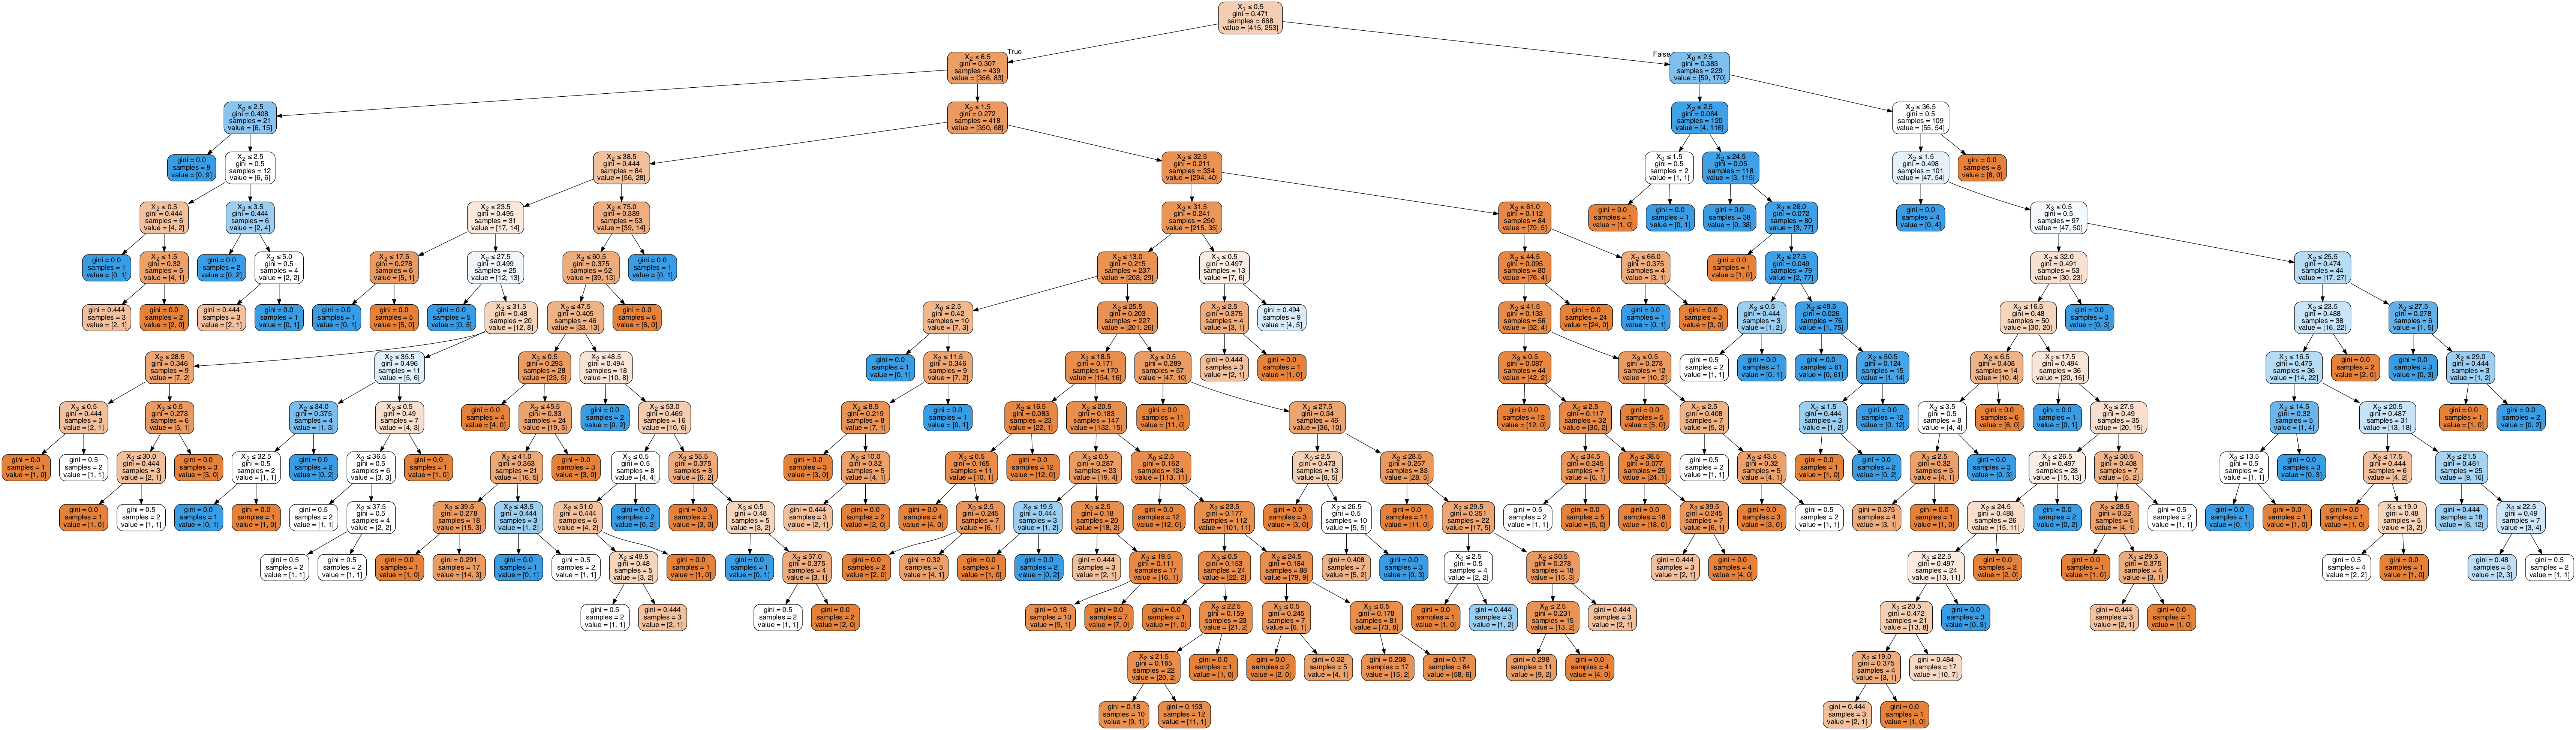

In [24]:
# Plot the decision tree
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
fig = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(fig.create_png())

In [25]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
#saved_acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
saved_acc_random_forest = random_forest.score(X_train, y_train)
saved_acc_random_forest

0.8997005988023952

In [26]:
blank_ages_removed = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN',  
              'Decision Tree', 'Random Forest'],
    'Score': [acc_log, acc_svc, acc_knn, acc_decision_tree, acc_random_forest]})
blank_ages_removed.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,0.829907
4,Random Forest,0.829907
2,KNN,0.820561
1,Support Vector Machines,0.807477
0,Logistic Regression,0.798131


In [27]:
ages_guessed = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN',  
              'Decision Tree', 'Random Forest'],
    'Score': [saved_acc_log, saved_acc_svc, saved_acc_knn, saved_acc_decision_tree, saved_acc_random_forest]})
ages_guessed.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,0.899701
4,Random Forest,0.899701
1,Support Vector Machines,0.832335
0,Logistic Regression,0.794910
2,KNN,0.793413
